In [83]:
import pandas as pd 
import json

In [84]:
df = pd.read_csv('data/movies_metadata.csv', low_memory=False)

In [85]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [86]:
df.loc[df['title'] != df['original_title']][['title', 'original_title']]

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal
...,...,...
45453,Mom,Maa
45455,St. Michael Had a Rooster,San Michele aveva un gallo
45461,Subdue,رگ خواب
45462,Century of Birthing,Siglo ng Pagluluwal


In [87]:
# Only take the necessary columns from the dataframe 
data = df[['title', 'overview', 'genres']]

In [88]:
data.head()

,title,overview,genres
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]"


In [89]:
data['genres'].head()

0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object

In [90]:
eval(data['genres'][0])

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [91]:
all_genres = dict()
def add_ele_to_dict(ele_list):
    ele_list = eval(ele_list)
    for ele in ele_list:
        if ele['name'] in all_genres:
            all_genres[ele['name']] += 1
        else:
            all_genres[ele['name']] = 1
            

data['genres'].apply(lambda x: add_ele_to_dict(x))

0        None
1        None
2        None
3        None
4        None
         ... 
45461    None
45462    None
45463    None
45464    None
45465    None
Name: genres, Length: 45466, dtype: object

In [92]:
all_genres

{'Animation': 1935,
 'Comedy': 13182,
 'Family': 2770,
 'Adventure': 3496,
 'Fantasy': 2313,
 'Romance': 6735,
 'Drama': 20265,
 'Action': 6596,
 'Crime': 4307,
 'Thriller': 7624,
 'Horror': 4673,
 'History': 1398,
 'Science Fiction': 3049,
 'Mystery': 2467,
 'War': 1323,
 'Foreign': 1622,
 'Music': 1598,
 'Documentary': 3932,
 'Western': 1042,
 'TV Movie': 767,
 'Carousel Productions': 1,
 'Vision View Entertainment': 1,
 'Telescene Film Group Productions': 1,
 'Aniplex': 1,
 'GoHands': 1,
 'BROSTA TV': 1,
 'Mardock Scramble Production Committee': 1,
 'Sentai Filmworks': 1,
 'Odyssey Media': 1,
 'Pulser Productions': 1,
 'Rogue State': 1,
 'The Cartel': 1}

In [93]:
allowed_genre = [genre for genre in all_genres if all_genres[genre] > 10]

In [94]:
allowed_genre

['Animation',
 'Comedy',
 'Family',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'History',
 'Science Fiction',
 'Mystery',
 'War',
 'Foreign',
 'Music',
 'Documentary',
 'Western',
 'TV Movie']

In [241]:
print(allowed_genre)

['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History', 'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music', 'Documentary', 'Western', 'TV Movie']


In [95]:
data.head()

,title,overview,genres
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]"


In [96]:
# Pick the first genre as the genre for the movie, 
# Converting the problem from multi-label to a multi-class problem. 

def getGenre(genre_list):
    genre_list = eval(genre_list)
    all_genre = []
    if len(genre_list) > 0: 
        for ele in genre_list:
            if ele['name'] in allowed_genre:
                all_genre.append(ele['name'])
    else:
        return 'unknown'
    return ','.join(all_genre)

In [97]:
data['genre'] = data['genres'].apply(lambda x: getGenre(x))

<ipython-input-97-bd8d73f94a7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre'] = data['genres'].apply(lambda x: getGenre(x))


In [98]:
data = data.loc[data['genre'].isin(allowed_genre)]

In [99]:
data = data.dropna()

In [100]:
data.shape

(42321, 4)

In [102]:
data.head()

,title,overview,genres,genre
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","Animation,Comedy,Family"
1,Jumanji,When siblings Judy and Peter discover an encha...,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","Adventure,Fantasy,Family"
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","Romance,Comedy"
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","Comedy,Drama,Romance"
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,"[{'id': 35, 'name': 'Comedy'}]",Comedy


In [103]:
final_data = data[['title', 'overview', 'genre']]

In [104]:
final_data.to_csv('data/movies_metadata_filtered_multilabel.csv', index=False)

# Building and training a model 

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/movies_metadata_filtered.csv')

In [3]:
data.head()

,title,overview,genre
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Animation
1,Jumanji,When siblings Judy and Peter discover an encha...,Adventure
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,Romance
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Comedy
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,Comedy


In [9]:
label_encoder = LabelEncoder()
int_encoding = label_encoder.fit_transform(data['genre'])
int_encoding = int_encoding.reshape(len(int_encoding), 1)

In [14]:
int_encoding.shape

(42321, 1)

In [77]:
int_encoding.reshape(-1).shape

(42321,)

In [8]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [12]:
onehot_encoded = enc.fit_transform(int_encoding)

In [13]:
onehot_encoded.shape

(42321, 20)

In [24]:
# Get the original class value back. 
label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])

array(['Animation'], dtype=object)

In [25]:
tfidf = TfidfVectorizer(stop_words='english')

In [26]:
data_tfidf = tfidf.fit_transform(data['overview'].to_numpy())

In [27]:
data_tfidf.shape

(42321, 73186)

In [78]:
x_train, x_test, y_train, y_test = train_test_split(data_tfidf, int_encoding.reshape(-1), test_size = 0.3, random_state=13)

### Randomforest

In [79]:
clf = RandomForestClassifier(n_jobs=4)

In [80]:
clf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=4)

In [81]:
test_pred = clf.predict(x_test)

In [82]:
y_test.shape

(12697,)

In [83]:
test_pred.shape

(12697,)

In [86]:
sum(y_test == test_pred)

5226

In [84]:
cm = confusion_matrix(y_test, test_pred)

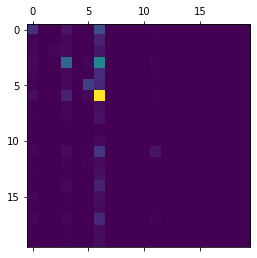

In [85]:
plt.matshow(cm)

### Trying out SVM

In [87]:
svm = LinearSVC()

In [88]:
svm.fit(x_train, y_train)

LinearSVC()

In [90]:
svm_pred = svm.predict(x_test)

In [91]:
sum(svm_pred == y_test)

5703

### Logistic regression

In [98]:
logistic = LogisticRegression(solver='saga', random_state=13)

In [99]:
logistic.fit(x_train, y_train)

LogisticRegression(random_state=13, solver='saga')

In [100]:
logistic_pred = logistic.predict(x_test)

## Trying a blog

In [220]:
import pandas as pd
import numpy as np
 
import torch
import torch.nn as nn
import torch.optim as optim
 
from torchtext.legacy import data
 
import random
import spacy
import re
 
SEED=13
torch.manual_seed(SEED)

In [221]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  

In [222]:
df = pd.read_csv('data/movies_metadata_filtered.csv')

In [223]:
df.head()

,title,overview,genre
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",Animation
1,Jumanji,When siblings Judy and Peter discover an encha...,Adventure
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,Romance
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Comedy
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,Comedy


In [224]:
genre_dict = {}
counter = 0
for genre in df['genre'].unique():
    genre_dict[genre] = counter
    counter += 1

In [225]:
tokenizer=spacy.load('en_core_web_sm')
 
stop_words=spacy.lang.en.STOP_WORDS
 
 
def spacy_token(x):
  x= re.sub(r'[^a-zA-Z\s]','',x)
  x= re.sub(r'[\n]',' ',x)
  return [tok.text for tok in tokenizer.tokenizer(x)]

In [226]:
def label_processing(label):
    ret = np.zeros(len(genre_dict), dtype=np.float32)
    ret[genre_dict[label]] = 1.0
#     ret = genre_dict[label]
    return ret

In [160]:
TEXT= data.Field(sequential=True,lower=True,tokenize=spacy_token, stop_words=stop_words, eos_token='EOS',include_lengths=True)
 
LABEL=data.LabelField(sequential=False,use_vocab=False,preprocessing=label_processing, pad_token=None,unk_token=None)
 
dataField=[(None,None),("overview",TEXT),("genre",LABEL)]

In [161]:
dataset = data.TabularDataset(path='data/movies_metadata_filtered.csv', format='csv', fields=dataField, skip_header=True)

In [162]:
train_data,val_data= dataset.split(split_ratio=0.8,random_state=random.seed(SEED))

In [242]:
TEXT.build_vocab(train_data)
TEXT.vocab.load_vectors('glove.6B.100d')
embedding = TEXT.vocab.vectors.to(device)

.vector_cache/glove.6B.zip: 862MB [09:00, 1.59MB/s]                               
100%|█████████▉| 399999/400000 [00:12<00:00, 32568.95it/s]


In [164]:
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, label_size, batch_size, embedding_weights, dropout=0.2):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        
        self.word_embeddings = nn.Embedding.from_pretrained(embedding_weights, freeze=True)
        
        self.lstm = nn.LSTM(embedding_dim, hidden_dim,
                            bidirectional = True, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(2*hidden_dim, label_size)
        self.act = nn.Softmax(dim=1)
 
    def forward(self, sentence, src_len, train = True):
        embeds = self.word_embeddings(sentence)

        packed_embedded = nn.utils.rnn.pack_padded_sequence(embeds, src_len)

        packed_outputs, (hidden,cell) = self.lstm(packed_embedded)
        
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1)
        
        hidden = self.dropout(hidden)
        
        fc_output = self.fc(hidden)
        outputs=self.act(fc_output)
        return outputs

In [165]:
class SimpleLSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, label_size, batch_size, embedding_weights, dropout=0.2):
        super(SimpleLSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        
        self.word_embeddings = nn.Embedding.from_pretrained(embedding_weights, freeze=True)
        self.dropout = nn.Dropout(dropout)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim,
                            bidirectional = False, 
                            batch_first=True)
        self.fc = nn.Linear(hidden_dim, label_size)
        self.act = nn.Softmax(dim = 1)
 
    def forward(self, sentence, src_len, train = True):
        embeds = self.word_embeddings(sentence)

        packed_embedded = nn.utils.rnn.pack_padded_sequence(embeds, src_len)

        packed_outputs, (hidden,cell) = self.lstm(packed_embedded)
        
        hidden = hidden.squeeze(dim=0)
        hidden = self.dropout(hidden)
        dense_outputs = self.fc(hidden)
        outputs=self.act(dense_outputs)
        return outputs

In [166]:
class AttentionLSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, label_size, batch_size, embedding_weights, dropout=0.2):
        super(AttentionLSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        
        self.word_embeddings = nn.Embedding.from_pretrained(embedding_weights, freeze=True)
        self.dropout = nn.Dropout(dropout)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim,
                            bidirectional = False, 
                            batch_first=True)
        self.fc = nn.Linear(hidden_dim, label_size)
        self.act = nn.Softmax(dim = 1)
        
    def attention_net(self, lstm_output, final_state):

        """ 
        Now we will incorporate Attention mechanism in our LSTM model. In this new model, we will use attention to compute soft alignment score corresponding
        between each of the hidden_state and the last hidden_state of the LSTM. We will be using torch.bmm for the batch matrix multiplication.

        Arguments
        ---------

        lstm_output : Final output of the LSTM which contains hidden layer outputs for each sequence.
        final_state : Final time-step hidden state (h_n) of the LSTM

        ---------

        Returns : It performs attention mechanism by first computing weights for each of the sequence present in lstm_output and and then finally computing the
                  new hidden state.

        Tensor Size :
                    hidden.size() = (batch_size, hidden_size)
                    attn_weights.size() = (batch_size, num_seq)
                    soft_attn_weights.size() = (batch_size, num_seq)
                    new_hidden_state.size() = (batch_size, hidden_size)

        """

        hidden = final_state.squeeze(0)
        attn_weights = torch.bmm(lstm_output, hidden.unsqueeze(2)).squeeze(2)
        soft_attn_weights = F.softmax(attn_weights, 1)
        new_hidden_state = torch.bmm(lstm_output.transpose(1, 2), soft_attn_weights.unsqueeze(2)).squeeze(2)

        return new_hidden_state
 
    def forward(self, sentence, src_len, train = True):
        embeds = self.word_embeddings(sentence)

        packed_embedded = nn.utils.rnn.pack_padded_sequence(embeds, src_len)

        packed_outputs, (hidden, cell) = self.lstm(packed_embedded)
        
        attn_output = self.attention_net(packed_outputs, hidden)
        
        hidden = attn_output.squeeze(dim=0)
        
        hidden = self.dropout(hidden)
        dense_outputs = self.fc(hidden)
        outputs=self.act(dense_outputs)
        return outputs

In [167]:
BATCH_SIZE = 128
nlabel = len(genre_dict)
hidden_dim = 128
learning_rate = 0.001
dropout = 0.2

train_iterator, valid_iterator = data.BucketIterator.splits(
    (train_data, val_data), 
    batch_size = BATCH_SIZE,
    sort_key = lambda x: len(x.overview),
    sort_within_batch=True,
    device = device)

In [168]:
model = LSTMClassifier(
    embedding_dim=embedding.shape[1], 
    hidden_dim=hidden_dim, 
    label_size=nlabel, 
    batch_size=BATCH_SIZE, 
    embedding_weights=embedding, 
    dropout=dropout
)
model = model.to(device)
 
optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay = 0.01)
loss_function = nn.BCELoss()
 
def model_accuracy(predict,y):
  true_predict= (predict.argmax(1)==y.argmax(1)).float()
  acc=true_predict.sum()/len(true_predict)
 
  return acc

In [169]:
epochs=30
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    train_acc = 0.0
    for i, batch in enumerate(train_iterator):
        (feature, batch_length), label = batch.overview, batch.genre
        batch_length = batch_length.to('cpu')
        label = label.float()
        optimizer.zero_grad()

        output = model(feature, batch_length) 

        loss = loss_function(output, label)
        acc = model_accuracy(output,label)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc+=acc.item() 
    print(f"Train:: Epoch: {epoch}, Loss: {train_loss/len(train_iterator)}, Accuracy: {train_acc/len(train_iterator)}")

    model.eval()
    val_loss = 0.0
    val_acc = 0.0 
    for i, batch in enumerate(valid_iterator):
        (feature, batch_length), label = batch.overview, batch.genre
        batch_length = batch_length.to('cpu')
        label = label.float()

        output = model(feature, batch_length) 
        loss = loss_function(output, label)
        acc = model_accuracy(output,label)

        val_loss += loss.item()
        val_acc += acc.item() 

    print(f"Validation:: Epoch: {epoch}, Loss: {val_loss/len(valid_iterator)}, Accuracy: {val_acc/len(valid_iterator)}")
    print("")

Train:: Epoch: 0, Loss: 0.15431635824014556, Accuracy: 0.32757710454598915
Validation:: Epoch: 0, Loss: 0.14155593158593818, Accuracy: 0.39365671641791045

Train:: Epoch: 1, Loss: 0.13977552697343645, Accuracy: 0.3999451197543234
Validation:: Epoch: 1, Loss: 0.1359510511827113, Accuracy: 0.41079757462686567

Train:: Epoch: 2, Loss: 0.1345477413456395, Accuracy: 0.4214708817455004
Validation:: Epoch: 2, Loss: 0.13122706938145764, Accuracy: 0.43050373134328357

Train:: Epoch: 3, Loss: 0.13104287478721366, Accuracy: 0.4384733309160988
Validation:: Epoch: 3, Loss: 0.129612438825529, Accuracy: 0.43481809701492535

Train:: Epoch: 4, Loss: 0.12874894915324336, Accuracy: 0.4479082002954663
Validation:: Epoch: 4, Loss: 0.1281305810631211, Accuracy: 0.44846082089552236

Train:: Epoch: 5, Loss: 0.12674446651395763, Accuracy: 0.45283336358250315
Validation:: Epoch: 5, Loss: 0.12708069395218322, Accuracy: 0.44053171641791045

Train:: Epoch: 6, Loss: 0.12486127977663616, Accuracy: 0.4648027032051446

In [243]:
torch.save(model, 'bi-lstm.pth')

In [244]:
model = torch.load('bi-lstm.pth')

In [415]:
model.eval()

LSTMClassifier(
  (word_embeddings): Embedding(75844, 50)
  (dropout): Dropout(p=0.2, inplace=False)
  (lstm): LSTM(50, 256, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (act1): ReLU()
  (fc2): Linear(in_features=256, out_features=20, bias=True)
  (act): Softmax(dim=None)
)

In [416]:
with torch.no_grad():
    total_loss = 0.0
    total_acc = 0.0
    for i, batch in enumerate(valid_iterator):
        (feature, batch_length), label = batch.overview, batch.genre
        batch_length = batch_length.to('cpu')
        label = label.float()
#         print(feature, batch_length)
        #             optimizer.zero_grad()
        output = model(feature, batch_length) 
#         print(output.shape, label.shape)
#         print(feature.shape, batch_length.shape)

        loss = loss_function(output, label)
        acc = model_accuracy(output,label)

#         print(loss.item(), acc.item())

        #             loss.backward()
        #             optimizer.step()

        total_loss += loss.item()
        total_acc += acc.item() 

    print(f"loss = {total_loss/len(valid_iterator)}")
    print(f"accuracy = {total_acc/len(valid_iterator)}")

<ipython-input-407-9cc0ecb9eabe>:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs=self.act(fc2_output)


loss = 0.19567031202031604
accuracy = 0.396571828358209


In [387]:
sample = "Ram and shyam are two people living in australia. They marry love each other and live happily ever after."

In [388]:
sample_vec = TEXT.preprocess(sample)

In [389]:
sample_vec

['ram',
 'shyam',
 'people',
 'living',
 'australia',
 'marry',
 'love',
 'live',
 'happily']

In [390]:
sample_vec = [[TEXT.vocab.stoi[x] for x in sample_vec]]

In [391]:
sample_vec

[[9337, 16781, 32, 59, 2189, 320, 9, 66, 1756]]

In [392]:
sample_vec_arr = np.asarray(sample_vec)

In [393]:
sample_vec_arr.shape

(1, 9)

In [394]:
sample_vec_arr = torch.LongTensor(sample_vec_arr).T

In [395]:
sample_vec_arr = sample_vec_arr.to(device)

In [396]:
sample_vec_arr.shape

torch.Size([9, 1])

In [397]:
len_tensor = torch.LongTensor([len(sample_vec)])

In [398]:
pred = model(sample_vec_arr, len_tensor)

<ipython-input-358-9cc0ecb9eabe>:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs=self.act(fc2_output)


In [399]:
pred.argmax(1).item()

7

In [77]:
genre_dict

{'Animation': 0,
 'Adventure': 1,
 'Romance': 2,
 'Comedy': 3,
 'Action': 4,
 'Family': 5,
 'History': 6,
 'Drama': 7,
 'Crime': 8,
 'Fantasy': 9,
 'Science Fiction': 10,
 'Thriller': 11,
 'Music': 12,
 'Horror': 13,
 'Documentary': 14,
 'Mystery': 15,
 'Western': 16,
 'TV Movie': 17,
 'War': 18,
 'Foreign': 19}

### Multilabel classification

In [228]:
import pandas as pd
import numpy as np
 
import torch
import torch.nn as nn
import torch.optim as optim
 
from torchtext.legacy import data
 
import random
import spacy
import re
 
SEED=13
torch.manual_seed(SEED)

In [229]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  

In [230]:
df = pd.read_csv('data/movies_metadata_filtered_multilabel.csv')

In [231]:
df.head()

,title,overview,genre
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...","Animation,Comedy,Family"
1,Jumanji,When siblings Judy and Peter discover an encha...,"Adventure,Fantasy,Family"
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,"Romance,Comedy"
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","Comedy,Drama,Romance"
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,Comedy


In [239]:
df['genre'].value_counts() > 100

Drama                                           True
Comedy                                          True
Documentary                                     True
Drama,Romance                                   True
Comedy,Drama                                    True
                                               ...  
Science Fiction,Animation,Adventure,Fantasy    False
Drama,War,Science Fiction                      False
Comedy,Foreign,Adventure                       False
Action,Drama,Horror,Crime,Thriller             False
Thriller,Comedy,Crime,Adventure                False
Name: genre, Length: 4044, dtype: bool

In [114]:
genre_dict = {}
counter = 0
for genre in allowed_genre:
    genre_dict[genre] = counter
    counter += 1

In [116]:
tokenizer=spacy.load('en_core_web_sm')
 
stop_words=spacy.lang.en.STOP_WORDS
 
 
def spacy_token(x):
  x= re.sub(r'[^a-zA-Z\s]','',x)
  x= re.sub(r'[\n]',' ',x)
  return [tok.text for tok in tokenizer.tokenizer(x)]

In [117]:
def label_processing(label):
    ret = np.zeros(len(genre_dict), dtype=np.float32)
    for ele in label.split(','):
        ret[genre_dict[ele]] = 1.0
#     ret = genre_dict[label]
    return ret

In [118]:
TEXT= data.Field(sequential=True,lower=True,tokenize=spacy_token,eos_token='EOS',stop_words=stop_words,include_lengths=True)
 
LABEL=data.LabelField(sequential=False,use_vocab=False,preprocessing=label_processing, pad_token=None,unk_token=None)
 
dataField=[(None,None),("overview",TEXT),("genre",LABEL)]

In [119]:
dataset = data.TabularDataset(path='data/movies_metadata_filtered_multilabel.csv', format='csv', fields=dataField, skip_header=True)

In [120]:
train_data,val_data= dataset.split(split_ratio=0.8,random_state=random.seed(SEED))

In [121]:
TEXT.build_vocab(train_data)
TEXT.vocab.load_vectors('glove.6B.50d')
embedding = TEXT.vocab.vectors.to(device)

In [122]:
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, label_size, batch_size, embedding_weights, dropout=0.2):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        
        self.word_embeddings = nn.Embedding.from_pretrained(embedding_weights, freeze=True)
        
        self.lstm = nn.LSTM(embedding_dim, hidden_dim,
                            bidirectional = True, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(2*hidden_dim, label_size)
        self.act = nn.Sigmoid()
 
    def forward(self, sentence, src_len, train = True):
        embeds = self.word_embeddings(sentence)

        packed_embedded = nn.utils.rnn.pack_padded_sequence(embeds, src_len)

        packed_outputs, (hidden,cell) = self.lstm(packed_embedded)
        
        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1)
        
        hidden = self.dropout(hidden)
        
        fc_output = self.fc(hidden)
        outputs=self.act(fc_output)
        return outputs

In [123]:
class SimpleLSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, label_size, batch_size, embedding_weights, dropout=0.2):
        super(SimpleLSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        
        self.word_embeddings = nn.Embedding.from_pretrained(embedding_weights, freeze=True)
        self.dropout = nn.Dropout(dropout)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim,
                            bidirectional = False, 
                            batch_first=True)
        self.fc = nn.Linear(hidden_dim, label_size)
        self.act = nn.Softmax(dim = 1)
 
    def forward(self, sentence, src_len, train = True):
        embeds = self.word_embeddings(sentence)

        packed_embedded = nn.utils.rnn.pack_padded_sequence(embeds, src_len)

        packed_outputs, (hidden,cell) = self.lstm(packed_embedded)
        
        hidden = hidden.squeeze(dim=0)
        hidden = self.dropout(hidden)
        dense_outputs = self.fc(hidden)
        outputs=self.act(dense_outputs)
        return outputs

In [124]:
class AttentionLSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, label_size, batch_size, embedding_weights, dropout=0.2):
        super(AttentionLSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        
        self.word_embeddings = nn.Embedding.from_pretrained(embedding_weights, freeze=True)
        self.dropout = nn.Dropout(dropout)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim,
                            bidirectional = False, 
                            batch_first=True)
        self.fc = nn.Linear(hidden_dim, label_size)
        self.act = nn.Softmax(dim = 1)
        
    def attention_net(self, lstm_output, final_state):

        """ 
        Now we will incorporate Attention mechanism in our LSTM model. In this new model, we will use attention to compute soft alignment score corresponding
        between each of the hidden_state and the last hidden_state of the LSTM. We will be using torch.bmm for the batch matrix multiplication.

        Arguments
        ---------

        lstm_output : Final output of the LSTM which contains hidden layer outputs for each sequence.
        final_state : Final time-step hidden state (h_n) of the LSTM

        ---------

        Returns : It performs attention mechanism by first computing weights for each of the sequence present in lstm_output and and then finally computing the
                  new hidden state.

        Tensor Size :
                    hidden.size() = (batch_size, hidden_size)
                    attn_weights.size() = (batch_size, num_seq)
                    soft_attn_weights.size() = (batch_size, num_seq)
                    new_hidden_state.size() = (batch_size, hidden_size)

        """

        hidden = final_state.squeeze(0)
        attn_weights = torch.bmm(lstm_output, hidden.unsqueeze(2)).squeeze(2)
        soft_attn_weights = F.softmax(attn_weights, 1)
        new_hidden_state = torch.bmm(lstm_output.transpose(1, 2), soft_attn_weights.unsqueeze(2)).squeeze(2)

        return new_hidden_state
 
    def forward(self, sentence, src_len, train = True):
        embeds = self.word_embeddings(sentence)

        packed_embedded = nn.utils.rnn.pack_padded_sequence(embeds, src_len)

        packed_outputs, (hidden, cell) = self.lstm(packed_embedded)
        
        attn_output = self.attention_net(packed_outputs, hidden)
        
        hidden = attn_output.squeeze(dim=0)
        
        hidden = self.dropout(hidden)
        dense_outputs = self.fc(hidden)
        outputs=self.act(dense_outputs)
        return outputs

In [125]:
BATCH_SIZE = 128
nlabel = len(genre_dict)
hidden_dim = 128
learning_rate = 0.001
dropout = 0.3

train_iterator, valid_iterator = data.BucketIterator.splits(
    (train_data, val_data), 
    batch_size = BATCH_SIZE,
    sort_key = lambda x: len(x.overview),
    sort_within_batch=True,
    device = device)

In [216]:
model = LSTMClassifier(
    embedding_dim=embedding.shape[1], 
    hidden_dim=hidden_dim, 
    label_size=nlabel, 
    batch_size=BATCH_SIZE, 
    embedding_weights=embedding, 
    dropout=dropout
)
model = model.to(device)
 
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
loss_function = nn.BCELoss()
 
def model_accuracy(predict,y):
  true_predict= (predict.argmax(1)==y.argmax(1)).float()
  acc=true_predict.sum()/len(true_predict)
 
  return acc


def multilabel_accuracy(predict, y, threshold = 0.6):    
    predictions = torch.where(predict > threshold, 1.0, 0.0).float()

    intersection = torch.where(predictions + y > 1, 1.0, 0.0)
    union = torch.where(predictions + y >= 1, 1.0, 0.0)
    acc = intersection.sum()/union.sum()
    return acc

In [217]:
multilabel_accuracy(torch.tensor([0.87, 0.24, 0.3]), torch.tensor([[1,0,1]]))

tensor(0.5000)

In [219]:
epochs=50
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    train_acc = 0.0
    for i, batch in enumerate(train_iterator):
        (feature, batch_length), label = batch.overview, batch.genre
        batch_length = batch_length.to('cpu')
        label = label.float()
        optimizer.zero_grad()

        output = model(feature, batch_length) 

        loss = loss_function(output, label)
        acc = multilabel_accuracy(output,label)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += acc.item() 
    print(f"Train:: Epoch: {epoch}, Loss: {train_loss/len(train_iterator)}, Accuracy: {train_acc/len(train_iterator)}")

    model.eval()
    val_loss = 0.0
    val_acc = 0.0 
    for i, batch in enumerate(valid_iterator):
        (feature, batch_length), label = batch.overview, batch.genre
        batch_length = batch_length.to('cpu')
        label = label.float()

        output = model(feature, batch_length) 
        loss = loss_function(output, label)
        acc = multilabel_accuracy(output,label)

        val_loss += loss.item()
        val_acc += acc.item() 

    print(f"Validation:: Epoch: {epoch}, Loss: {val_loss/len(valid_iterator)}, Accuracy: {val_acc/len(valid_iterator)}")
    print("")

Train:: Epoch: 0, Loss: 0.057634812396652295, Accuracy: 0.6076423761979589
Validation:: Epoch: 0, Loss: 0.18616692632881562, Accuracy: 0.21915652791955578

Train:: Epoch: 1, Loss: 0.05502048965613797, Accuracy: 0.6231977794530257
Validation:: Epoch: 1, Loss: 0.19663861772017693, Accuracy: 0.23078933358192444

Train:: Epoch: 2, Loss: 0.052276486432496105, Accuracy: 0.6442790275474765
Validation:: Epoch: 2, Loss: 0.19978054156943933, Accuracy: 0.23130823560615085

Train:: Epoch: 3, Loss: 0.050222306853195404, Accuracy: 0.6575803283250556
Validation:: Epoch: 3, Loss: 0.20285056397986057, Accuracy: 0.22607200759560314

Train:: Epoch: 4, Loss: 0.04916170597216993, Accuracy: 0.6649123142350395
Validation:: Epoch: 4, Loss: 0.20981749225018628, Accuracy: 0.23369305525253067

Train:: Epoch: 5, Loss: 0.04752675617500296, Accuracy: 0.6763206001722588
Validation:: Epoch: 5, Loss: 0.21566741835715167, Accuracy: 0.22132272150979113

Train:: Epoch: 6, Loss: 0.05096216631947823, Accuracy: 0.6489277862